# Impotant Modules

In [94]:
import warnings
from collections import namedtuple
from typing import Callable, Any, Optional, Tuple, List

import torch
import torch.nn.functional as F
from torch import nn
from torch import Tensor


In [95]:
import torchvision.models as models
import torchvision
import torch

In [96]:
import matplotlib.pyplot as plt
import numpy as np

In [97]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader


In [98]:
import importlib.machinery
import os

from torch.hub import _get_torch_home

from torch.hub import load_state_dict_from_url  

In [99]:
from torchvision import utils

# **Inception Model:**

---



In [100]:
def inception_v3(pretrained: bool = False, progress: bool = True, **kwargs: Any):
    return Inception3(**kwargs)

class Inception3(nn.Module):

    def __init__(
        self,
        num_classes: int = 1000,
        aux_logits: bool = True,
        transform_input: bool = False,
    ) -> None:
        super(Inception3, self).__init__()
        self.transform_input = transform_input

        self.Conv1x1 = BasicConv2d(3, 80, kernel_size=1,stride=2)


    def _transform_input(self, x: Tensor) -> Tensor:
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        return x

    def _forward(self, x: Tensor) -> Tuple[Tensor, Optional[Tensor]]:
        # N x 3 x 299 x 299
        x = self.Conv1x1(x)
        print(x)
        return x
    def forward(self, x: Tensor):
        x = self._transform_input(x)
        x = self._forward(x)

        return x
        
         




class BasicConv2d(nn.Module):
      def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

      def forward(self, x: Tensor) -> Tensor:
      
        x = self.conv(x)
        x = self.bn(x)
        print('Output of Convolution 1*1')

        y = x[0][0].detach().numpy()
        plt.imshow(y)
        plt.show()
        return F.relu(x, inplace=True)


    






# Model Import

---



In [101]:
inception = inception_v3(pretrained=True)

# Output Model

In [102]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [103]:
from PIL import Image
input_image = Image.open(filename)

In [104]:
np.array(input_image).shape

(1213, 1546, 3)

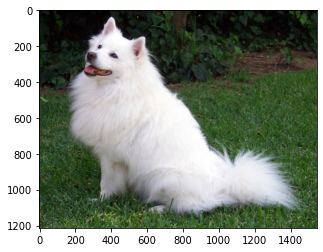

In [105]:
plt.imshow(input_image)

In [106]:

preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)

In [107]:

input_tensor.shape

torch.Size([3, 299, 299])

In [108]:
y = input_tensor.numpy().transpose(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


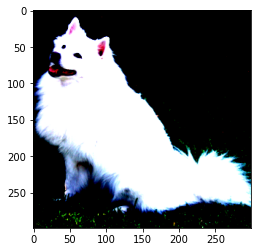

In [109]:
plt.imshow(y)

In [110]:
input_batch = input_tensor.unsqueeze(0) 

In [111]:
inception.eval()

Inception3(
  (Conv1x1): BasicConv2d(
    (conv): Conv2d(3, 80, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
)

Output of Convolution 1*1


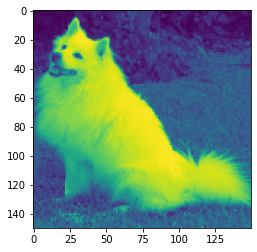

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [112]:
output= inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)

#Output  2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


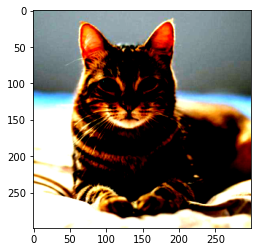

Output of Convolution 1*1


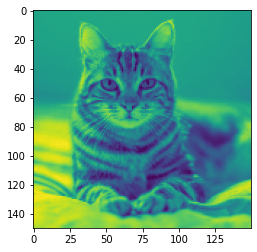

tensor([[[[0.3167, 0.3167, 0.3167,  ..., 0.2595, 0.2595, 0.2595],
          [0.3167, 0.3167, 0.3167,  ..., 0.2699, 0.2699, 0.2595],
          [0.3167, 0.3167, 0.3167,  ..., 0.2699, 0.2699, 0.2595],
          ...,
          [1.1092, 1.1051, 1.0970,  ..., 0.7953, 0.8162, 0.8579],
          [1.0677, 1.0636, 1.0636,  ..., 0.7883, 0.8357, 0.8684],
          [1.0363, 1.0363, 1.0363,  ..., 0.7908, 0.8357, 0.8645]],

         [[0.4283, 0.4283, 0.4283,  ..., 0.3395, 0.3395, 0.3395],
          [0.4283, 0.4283, 0.4283,  ..., 0.3512, 0.3512, 0.3395],
          [0.4283, 0.4283, 0.4283,  ..., 0.3512, 0.3512, 0.3395],
          ...,
          [1.0278, 1.0340, 1.0463,  ..., 0.5212, 0.5445, 0.5910],
          [0.9726, 0.9788, 0.9788,  ..., 0.5616, 0.5805, 0.6026],
          [0.9377, 0.9377, 0.9377,  ..., 0.5769, 0.5805, 0.6001]],

         [[0.1082, 0.1082, 0.1082,  ..., 0.0868, 0.0868, 0.0868],
          [0.1082, 0.1082, 0.1082,  ..., 0.0897, 0.0897, 0.0868],
          [0.1082, 0.1082, 0.1082,  ..., 0

In [113]:
import urllib
url, filename = ("https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg", "cat.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
y = input_tensor.numpy().transpose(1,2,0)
plt.imshow(y)
plt.show()
input_batch = input_tensor.unsqueeze(0) 
output = inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)

# Output 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


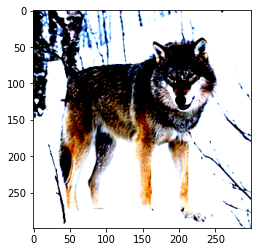

Output of Convolution 1*1


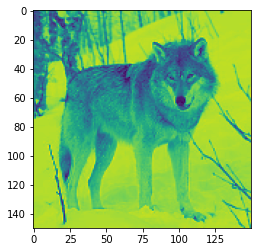

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 1.0068, 1.0068, 1.0068],
          [0.0000, 0.0000, 0.0000,  ..., 1.0068, 1.0068, 1.0068],
          [0.0000, 0.0000, 0.0000,  ..., 1.0068, 1.0068, 1.0068],
          ...,
          [0.9860, 1.0068, 1.0173,  ..., 1.0540, 0.6364, 0.4693],
          [0.9860, 0.9860, 1.0173,  ..., 1.0291, 0.9247, 0.1520],
          [1.0173, 1.0068, 0.9964,  ..., 0.9977, 1.1335, 0.0684]],

         [[0.0000, 0.0000, 0.0000,  ..., 1.4164, 1.4164, 1.4164],
          [0.0000, 0.0000, 0.0000,  ..., 1.4164, 1.4164, 1.4164],
          [0.0000, 0.0000, 0.0000,  ..., 1.4164, 1.4164, 1.4164],
          ...,
          [1.3931, 1.4164, 1.4281,  ..., 1.4440, 0.9786, 0.7925],
          [1.3931, 1.3931, 1.4281,  ..., 1.4269, 1.3106, 0.4496],
          [1.4281, 1.4164, 1.4048,  ..., 1.3920, 1.5432, 0.3565]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.4436, 0.4436, 0.4436],
          [0.0000, 0.0000, 0.0000,  ..., 0.4436, 0.4436, 0.4436],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [114]:
import urllib
url, filename = ("https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Eurasian_wolf_2.jpg/330px-Eurasian_wolf_2.jpg", "wolf.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
y = input_tensor.numpy().transpose(1,2,0)
plt.imshow(y)
plt.show()
input_batch = input_tensor.unsqueeze(0) 
output = inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)